# Supervised learning:is a type of machine learning where the model is trained on labeled data — meaning each training example comes with an input and the correct output.

Goal: Learn a function that maps inputs to desired outputs.

Common examples:
Regression: Predicting house prices based on features like size, location 
Classification: Identifying whether an email is spam or not

Feature         	Regression	                     Classification
Output Type	        Continuous value	             Discrete class label
Examples	        Predicting price, temperature	 Predicting species, spam detection
Algorithms	        Linear Regression, SVR, etc.	 Logistic Regression, Decision Trees, etc.

Scikit-learn is like a toolbox for machine learning in Python.
It gives you:

Algorithms (like decision trees, linear regression)
Tools to split data, check accuracy, and more
It's easy to use and works well with pandas and numpy


In [ ]:
#Start to use Sciki-learn

from sklearn.linear_model import LinearRegression
model = LinearRegression()


 Features (X) vs Labels (y):----------------
Think of features (X) as the information you know — like clues.
Think of labels (y) as the answer you want to guess.

>> X = data[["Size", "Bedrooms"]]
   y = data["Price"]



Train/Test Split--------------------------------
We teach the model using part of the data (training set) and test it with the rest (test set) to see how well it learned.
Why? It’s like studying for a test. You learn with some examples (train), and then you take the test on new questions (test).

>> from sklearn.model_selection import train_test_split
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

 Accuracy Score---------------------------------------
This tells us how well our model is doing.

-For classification problems (like guessing if a fruit is an apple or banana), it tells us the percentage of correct guesses.
-For regression, we use other scores (like R², not "accuracy" per se).

>> from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Model Accuracy: 1.0


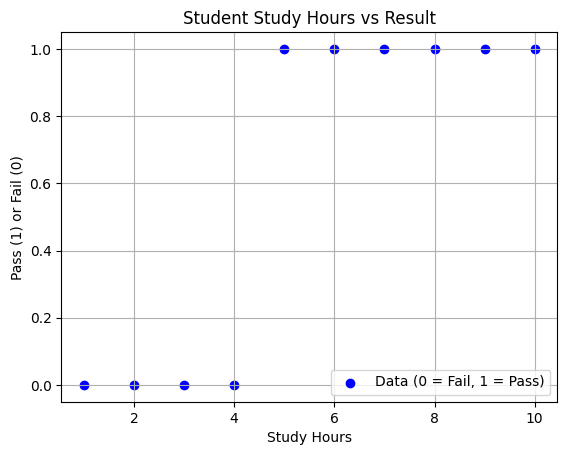

Enter number of study hours:  4


❌ Likely to FAIL.


In [5]:

# Importing the necessary libraries
import matplotlib.pyplot as plt  #This imports matplotlib, a library used to draw graphs.
from sklearn.model_selection import train_test_split #train_test_split: splits your data into training and testing sets
from sklearn.linear_model import LogisticRegression  #LogisticRegression: the model we're using to make predictions
from sklearn.metrics import accuracy_score  #accuracy_score: tells us how accurate our model is


# Step 1: Create sample data
# X = hours studied, y = 1 if pass, 0 if fail
X = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]  # features (study hours), X is the input (features): how many hours each student studied
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]                      # labels (0 = fail, 1 = pass), y is the output (labels): 0 means fail, 1 means pass


# Step 2: Split the data into training and testing sets
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state=42 just makes sure the split is the same every time you run it (for consistency).


# Step 3: Create and train the model
model = LogisticRegression()  # We create a logistic regression model, .fit() = we train the model using the training data
model.fit(X_train, y_train)  #It tries to find a pattern between study hours and pass/fail

# Step 4: Make predictions on test data and evaluate
predictions = model.predict(X_test)  # Now the model uses what it learned to predict if students in the test set will pass or fail.
accuracy = accuracy_score(y_test, predictions)  # checks how correct the model's guesses were by comparing them to the real answers.
print("Model Accuracy:", accuracy)   #The accuracy will be a number between 0 and 1 (e.g., 0.8 = 80% correct).

# Step 5: Plotting
study_hours = [x[0] for x in X]  # Flattening [[1], [2], ...] to [1, 2, ...]
plt.scatter(study_hours, y, color='blue', label='Data (0 = Fail, 1 = Pass)')
plt.xlabel('Study Hours')
plt.ylabel('Pass (1) or Fail (0)')
plt.title('Student Study Hours vs Result')
plt.legend()
plt.grid(True)
plt.show()


# Step 6: Interactive prediction
try:
    user_input = float(input("Enter number of study hours: "))
    result = model.predict([[user_input]])
    if result[0] == 1:
        print("✅ Likely to PASS!")
    else:
        print("❌ Likely to FAIL.")
except ValueError:
    print("Please enter a valid number.")


#It draws a curve that helps the model decide:
#“At how many hours does the chance of passing go from low to high?”
#It doesn’t just memorize data — it learns a rule that it can apply to new numbers too.


In [13]:
#hands-on Titanic Survival Prediction project using all the tools we learned about

#🚢 Titanic Survival Prediction using Logistic Regression

# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load Titanic dataset
# You can use seaborn to load it easily, or download the CSV if needed
import seaborn as sns
titanic = sns.load_dataset('titanic')  # loads built-in Titanic dataset
print(titanic.head(10))  # View first few rows


# Step 3: Preprocessing And Cleaning------------------------------------------------------------

# Drop irrelevant columns
titanic = titanic.drop(columns=['name', 'ticket', 'cabin'], errors ='ignore' )

# Handle missing values
titanic['age']= titanic['age'].fillna(titanic['age'].median())     # Fill missing ages
# Fill missing values in 'embarked' safely
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
# Most common port
titanic.dropna(subset=['fare'], inplace=True)  # Drop rows where fare is missing

# Convert categorical columns to numeric using one-hot encoding
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)

# Drop any rows with missing 'embark_town' or other edge-case columns
titanic = titanic.drop(columns=['embark_town', 'alive', 'class', 'who', 'adult_male', 'deck', 'alone'])

# Check cleaned data
print(titanic.head(10))


# Step 4: Define features (X) and label (y)
X = titanic.drop(columns=['survived'])  # Features
y = titanic['survived']                # Label (0 = did not survive, 1 = survived)

# Step 5: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Train Logistic Regression model
model = LogisticRegression(max_iter=200)  # Add max_iter to avoid convergence warning
model.fit(X_train, y_train)

# Step 7: Predict and evaluate-----------------------------------
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\n📄 Classification Report:\n", class_report)


   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes


💡 What we did:
Loaded the Titanic dataset using seaborn (easy & clean).

Preprocessed the data:
Filled in missing values (age, embarked)
Removed unnecessary columns (like name, ticket)
Converted categorical columns (like sex, embarked) to numbers using one-hot encoding
Split the data into training and testing sets
Trained a Logistic Regression model (perfect for binary outcomes like survived/didn't)
Predicted survival on the test data

Evaluated the model using:

✅ Accuracy Score: How many predictions were correct
📊 Confusion Matrix: Breakdown of true positives, false negatives, etc.
📄 Classification Report: Includes precision, recall, and F1-score

Analyzing the OUTPUT---------------------------------------------------------

>> Accuracy: 0.80
This means the model correctly predicted whether a passenger survived or not 80% of the time on the test data.

It’s a good starting point!

Matrix tells us how the model performed on two classes:
                                     Predicted ❌ Died (0)          	     Predicted ✅ Survived (1)
Actual Died (0)                      92 (True Negatives)	                 15 (False Positives)
Actual Survived (1)           	     20 (False Negatives)	                 52 (True Positives)

🟢 92 people who died were correctly predicted to have died.
🟢 52 people who survived were correctly predicted to survive.
🔴 15 people were wrongly predicted to survive, but they died.
🔴 20 people were wrongly predicted to die, but they survived.


📄 Classification Report:
Class	                Precision	      Recall	 F1-score
0 (Died)	            0.82	          0.86    	 0.84
1 (Survived)	        0.78	          0.72	     0.75

Precision = How many predicted "survived" were actually correct?
-   78% for survived passengers (class 1)
-   
Recall = How many actual survivors did the model catch?
-   72% of real survivors were caught.
-   
F1-score = Balance of precision & recall
-   Higher = better balance

Coclusion--------------------------------------
Model is doing well (80% accuracy) for a simple logistic regression!
It's better at identifying who didn't survive than who did.
False Negatives (missed survivors) are slightly more than False Positives, meaning:
    - It sometimes predicts someone didn't survive when they actually did — something you might care about in real-life life/death predictions.




 Challenge Zone 🚀----------->

 -Try a **Decision Tree** model as well
 -Compare which model did better
 -Plot the tree using plot_tree() if time allows


🔵 Logistic Regression
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


🟢 Decision Tree
Accuracy: 0.7988826815642458
Confusion Matrix:
 [[92 13]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



C:\Users\ravit\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127876 (\N{CHRISTMAS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


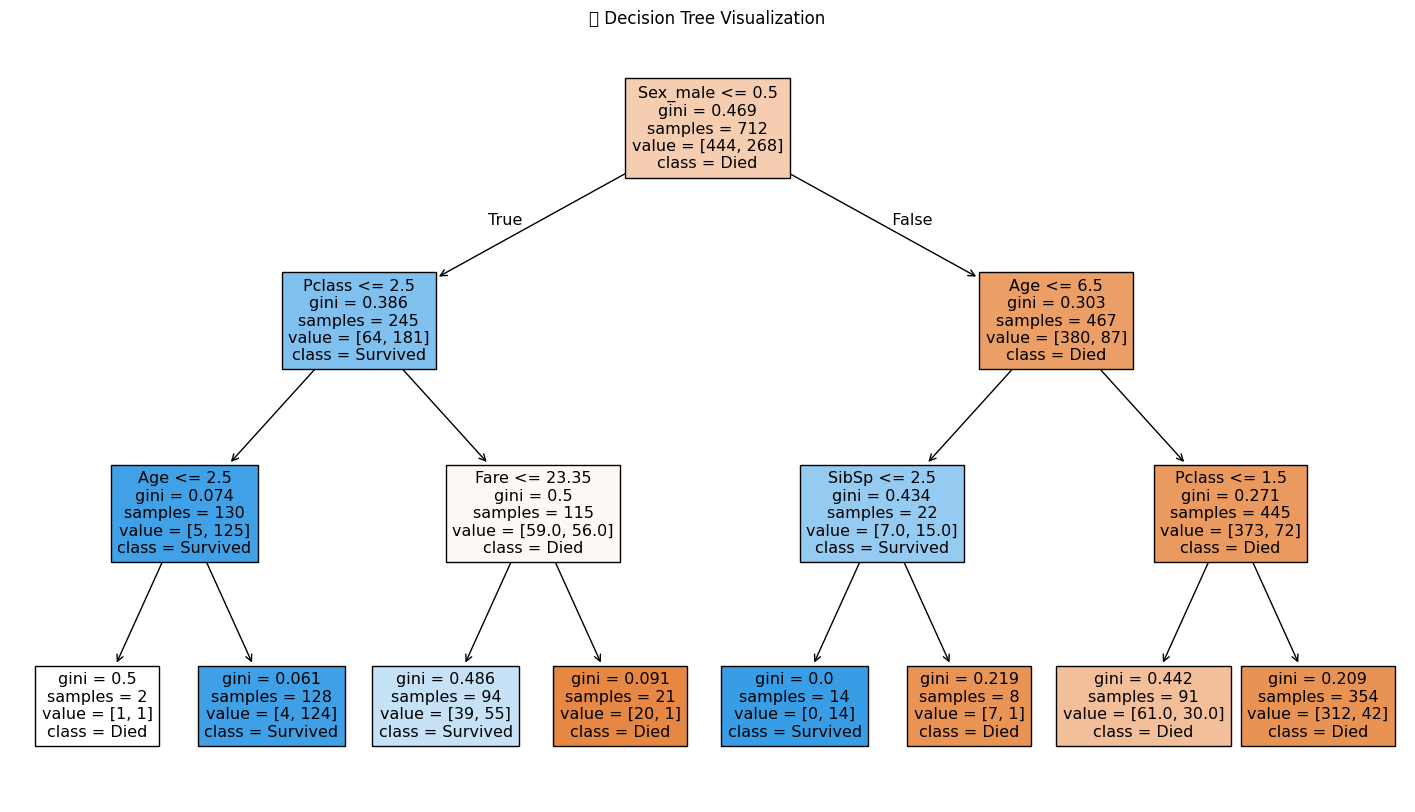

In [19]:
# Decision Tree vs Logistic Regression


# 📦 Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 📥 Step 2: Load dataset
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# 🧼 Step 3: Preprocessing
# Drop irrelevant columns
titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Fill missing Age with median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Convert categorical features: Sex, Embarked
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

# 🎯 Step 4: Define features and target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# 🔀 Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Step 6: Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("\n🔵 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))

# 🌳 Step 7: Decision Tree Model


dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("\n🟢 Decision Tree")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))

# 🖼️ Step 8: Plot Decision Tree (Optional)
plt.figure(figsize=(18, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Died", "Survived"])
plt.title("🎄 Decision Tree Visualization")
plt.show()





Final Comparison: Logistic Regression vs Decision Tree----------------------------------------------------------------------------------------------


Metric	                         Logistic Regression	           Decision Tree
Accuracy	                     ✅ 0.81	                       0.78
Precision (Class 1)	             0.79	                           0.73
Recall (Class 1)	             ✅ 0.74	                       0.76 (slightly higher)
F1-score (Class 1)	             ✅ 0.76	                       0.74
False Positives	                 15	                               21 (more wrong "survived")
False Negatives	                 ✅ 19 (lower)	                   18 (very close)



🧠 Insights------------------------------------------------------------------------------------------------------------------------------------------

Logistic Regression performed slightly better overall in accuracy and precision.
Decision Tree was a bit more aggressive in predicting survivors, which led to more false positives.
Logistic Regression is a better choice here when we want balanced performance.
Decision Trees, while not winning here, are still very interpretable and can be visualized easily for rule-based understanding.


For the Titanic dataset, Logistic Regression was the better performing model in this setup,
offering higher accuracy and more balanced precision-recall tradeoff for both survived and not-survived classes.


Blurry Tree ----------------------------------------------------------------------------------------------------------------------------------
This is a fully grown tree with no depth limitation, which leads to:

Overfitting: It tries to perfectly classify the training data by branching deeply, which reduces its ability to generalize to new, unseen data.
Low interpretability: It's hard to understand or extract meaningful decision rules from this giant maze.
Complexity vs. Performance Tradeoff: Even with all that complexity, its performance was still lower than the simpler logistic regression model.


Insight                          	Explanation
🔝 Gender matters most           	First and strongest split is on gender (Sex_male)
🎟️ Class and Fare matter too	    For females and some males, survival is affected by class and fare
👶 Age helps refine	                Younger passengers (especially under 2.5 or 6.5) had higher chances of survival
🔵 Blue = Survived	                The more blue the box, the higher survival rate
🟠 Orange = Died	                The more orange the box, the more people in that node died
🧮 Gini	                            Closer to 0 = purer node (better prediction confidence)